### Project Goal
Exploratory Data Analysis is being performed on this dataset of car sales. Once EDA is completed, the cleaned dataset will be used for a web application to filter trends.
The following dataset is going to be:
* Cleaned, check for any duplicates or missing values, and ensure the correct datatypes are in place.
* Statistical analysis will be performed to find key metrics about data
* Results of statistical analysis will be plotted

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import os

In [6]:
carsDF = pd.read_csv(r'C:\Users\mikey\Desktop\Tripple Ten\Sprint 4 project\vehicles_us.csv')

In [7]:
def analyze_data(df):
    print(df.head())
    print(' ')
    print(df.info())
    print(' ')
    print('----------------------------')
    print('Potential Duplicates')
    print(' ')
    print(df.duplicated().sum())
    print(' ')
    print('----------------------------')
    print(' ')
    print('Potential Missing Values')
    print(' ')
    print(df.isna().sum())

In [8]:
analyze_data(carsDF)

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   C

In [9]:
carsDF[['model', 'model_year', 'type', 'is_4wd']].head(20)

,model,model_year,type,is_4wd
0,bmw x5,2011.0,SUV,1.0
1,ford f-150,NaN,pickup,1.0
2,hyundai sonata,2013.0,sedan,NaN
3,ford f-150,2003.0,pickup,NaN
4,chrysler 200,2017.0,sedan,NaN
5,chrysler 300,2014.0,sedan,1.0
6,toyota camry,2015.0,sedan,NaN
7,honda pilot,2013.0,SUV,1.0
8,kia sorento,2012.0,SUV,1.0
9,honda pilot,2008.0,SUV,1.0


After further analysis it is concluded that 1 is for yes and NaN is for no if the car has 4wd

In [11]:
(carsDF['odometer'].notna() & carsDF['odometer'] % 1 != 0).sum()

0

Checking to see if odometer column has any decimal value besides 0.

In [13]:
(carsDF['cylinders'].notna() & carsDF['cylinders'] % 1 != 0).sum()

0

Checking to see if cylinders column has any decimal value besides 0.

### carsDF description
This dataset has 51,525 entries with 13 columns. No duplicates have been found and there are multiple columns with missing values. Incorrect datatypes go as follows: model_year, cylinders, is_4wd, odometer, and date_posted 

#### Dataset Corrections
* Change datatypes
  - model_year float to int
  - cylinders float to int
  - odometer float to int
  - is_4wd if float to int
  - date_posted object to datetime
* Missing values
   - model_year fill with 0
   - cylinders fill with median value for each unique model
   - odometer fill with 0
   - paint_color fill with Unknown
   - is_4wd fill with 0 

In [16]:
carsDF[['model_year', 'is_4wd', 'odometer']] = carsDF[['model_year', 'is_4wd', 'odometer']].fillna(0).astype(int)

In [17]:
for model in carsDF['model'].unique():
    # find the median for each of these models
    median_value = carsDF[carsDF['model'] == model]['cylinders'].median()
    
    # find the rows with these models and use a simple fillna
    carsDF.loc[carsDF['model']==model, 'cylinders'] = carsDF.loc[carsDF['model']==model, 'cylinders'].fillna(median_value)

Filling the NaN values for cylinders column with median value from each unique model.  

In [19]:
carsDF['cylinders'] = carsDF['cylinders'].astype(int)

Rounding down the median cylinder values to base whole number by changing column to int

In [21]:
carsDF['paint_color'] = carsDF['paint_color'].fillna('unknown')

In [22]:
carsDF['date_posted'] = pd.to_datetime(carsDF['date_posted'], format = '%Y-%m-%d')

In [23]:
analyze_data(carsDF)

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500           0      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas         0   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV     unknown       1  2018-06-23           19  
1    automatic  pickup       white       1  2018-10-19           50  
2    automatic   sedan         red       0  2019-02-07           79  
3    automatic  pickup     unknown       0  2019-03-22            9  
4    automatic   sedan       black       0  2019-04-02           28  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   C

Confirming the changes made to the carsDF dataset, changes are correct.

Add column for brand of each car.

In [26]:
carsDF['brand'] = carsDF['model'].str.split(' ').str[0]

In [27]:
analyze_data(carsDF)

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500           0      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas         0   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed     brand  
0    automatic     SUV     unknown       1  2018-06-23           19       bmw  
1    automatic  pickup       white       1  2018-10-19           50      ford  
2    automatic   sedan         red       0  2019-02-07           79   hyundai  
3    automatic  pickup     unknown       0  2019-03-22            9      ford  
4    automatic   sedan       black       0  2019-04-02           28  chrysler  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525

saving new dataset

In [29]:
carsDF.to_csv('cleaned_used_car_data.csv', index = False)

Saving cleaned data as a new file

In [31]:
os.getcwd()

'C:\\Users\\mikey\\Desktop\\Tripple Ten\\Sprint 4 project\\Sprint-4-Project-Web-Application'

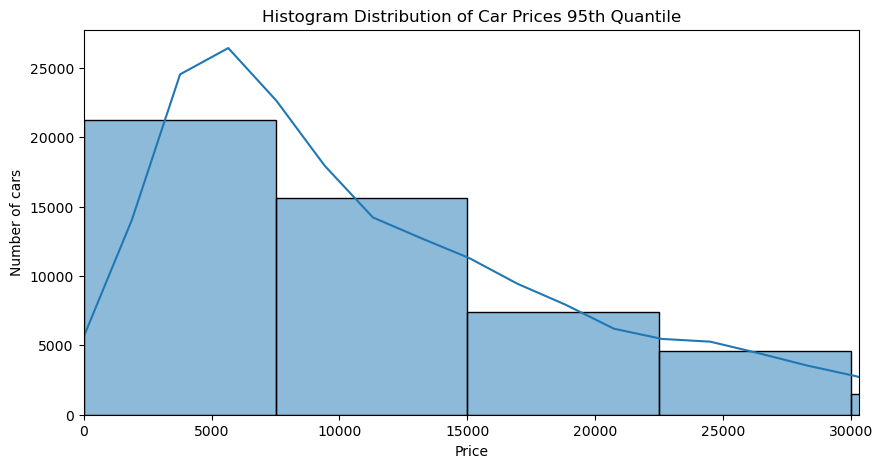

In [32]:
plt.figure(figsize = (10, 5))
sns.histplot(carsDF['price'], bins = 50, kde = True)
plt.xlim(0, carsDF['price'].quantile(0.95))
plt.xlabel('Price')
plt.ylabel('Number of cars')
plt.title('Histogram Distribution of Car Prices 95th Quantile')
plt.show()

### Histogram Conclusion
This chart presents a more accurate representation by removing outliers. It reveals that over 20,000 cars are priced between `$0 and $7,500`, making this the most common price range. The availability of cars in the `$7,500 to $15,000` range decreases by approximately 25%, compared to the previous bracket. Beyond \$15,000, the number of available cars declines sharply, indicating that higher-priced vehicles are significantly less common in the dataset.   

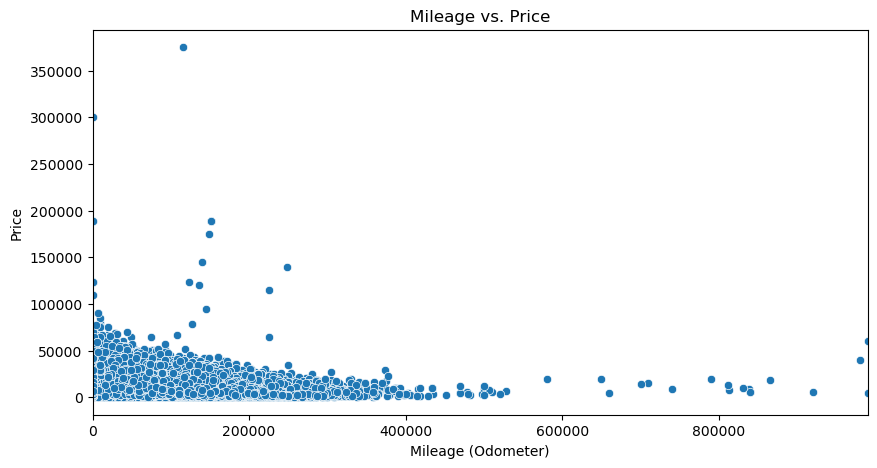

In [34]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = carsDF['odometer'], y = carsDF['price'])
plt.xlim(0, carsDF['odometer'].max())
plt.xlabel('Mileage (Odometer)')
plt.ylabel('Price')
plt.title('Mileage vs. Price')
plt.show()

### Scatterplot Conclusion
The chart indicates that cars with lower mileage tend to have higher prices. As mileage increases, the price generally decreases, suggesting that vehicles with less wear and tear retain more value.

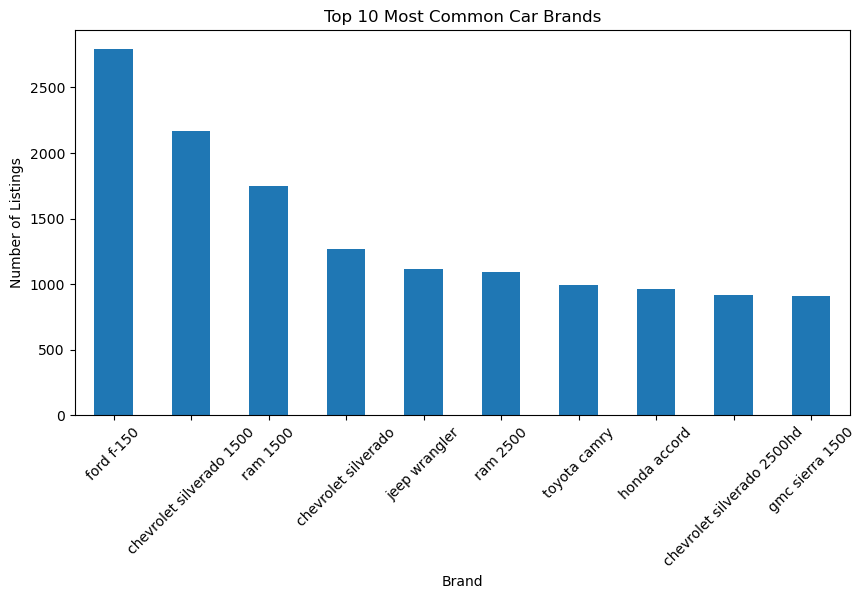

In [36]:
carsDF['model'].value_counts().head(10).plot(kind = 'bar', figsize = (10, 5))
plt.xlabel('Brand')
plt.xticks(rotation = 45)
plt.ylabel('Number of Listings')
plt.title('Top 10 Most Common Car Brands')
plt.show()

### Bar Chart Conclusion
The Ford F-150 leads with over 2,500 listings, followed by the Chevrolet Silverado 1500 with just over 2,000 listings, and the Ram 1500 in third place with around 1,750 listings. This suggests that full-size pickup trucks dominate the market, reflecting their high demand. Smaller 4WD vehicles, while present, do not come close in popularity compared to the Ford F-150, reinforcing the preference for larger trucks.

## Final Conclusion of Dataset
Overall, these insights paint a clear picture of the used car market. Affordability remains a primary concern, with most cars priced below $15,000. Lower mileage is a significant factor in resale value, as buyers seek vehicles with better longevity. Pickup trucks, particularly full-size models, are the most popular type of vehicle, reflecting strong consumer interest in durability and functionality. These trends provide valuable information for both buyers and sellers, helping them understand the market dynamics that influence pricing, demand, and purchasing decisions.